In [1]:
#  Load results
import os
import pandas as pd

results_list = []
for idx in range(1, 21):
    results = pd.read_csv("./results/survey/between" + str(idx).zfill(3) + ".csv")
    results_list.append(results)

In [2]:
# Load form information
forms = []
for idx in range(1, 11):
    form = pd.read_csv("./forms/sample" + str(idx).zfill(3) + ".csv")
    forms.append(form)

In [3]:
# Create stats
class Stats():
    def __init__(self):
        self.full_understand = []
        self.full_sudden = []
        self.omit_understand = []
        self.omit_sudden = []
        self.condition = ""
        self.full_rater = []
        self.omit_rater = []
        return

stats_list = []
for idx_form, form in enumerate(forms):
    full_results = results_list[idx_form * 2]
    omit_results = results_list[idx_form * 2 + 1]
    for idx, row in enumerate(form.itertuples()):
        stats = Stats()

        data_full_understand = full_results.iloc[:, [4 + idx * 3]]
        data_full_understand = data_full_understand.set_axis(["understand"], axis=1)
        stats.full_understand = data_full_understand["understand"].values.tolist()

        data_full_sudden = full_results.iloc[:, [5 + idx * 3]]
        data_full_sudden = data_full_sudden.set_axis(["sudden"], axis=1)
        stats.full_sudden = data_full_sudden["sudden"].values.tolist()

        data_omit_understand = omit_results.iloc[:, [4 + idx * 3]]
        data_omit_understand = data_omit_understand.set_axis(["understand"], axis=1)
        stats.omit_understand = data_omit_understand["understand"].values.tolist()

        data_omit_sudden = omit_results.iloc[:, [5 + idx * 3]]
        data_omit_sudden = data_omit_sudden.set_axis(["sudden"], axis=1)
        stats.omit_sudden = data_omit_sudden["sudden"].values.tolist()

        stats.condition = row.condition
        stats.full_rater = [idx_form * 3, idx_form * 3 + 1, idx_form * 3 + 2]
        stats.omit_rater = [idx_rater + 30  for idx_rater in stats.full_rater]

        stats_list.append(stats)

In [4]:
# Show summary
import statistics
import numpy as np

full_understand_high = []
full_sudden_high = []
omit_understand_high = []
omit_sudden_high = []
full_understand_low = []
full_sudden_low = []
omit_understand_low = []
omit_sudden_low = []

for stats in stats_list:
    # print("------------")
    # print("full understand: ", stats.full_understand)
    # print("full sudden: ", stats.full_sudden)
    # print("omit understand: ", stats.omit_understand)
    # print("omit sudden: ", stats.omit_sudden)
    # print("differ: ", stats.differ)
    # print("condition: ", stats.condition)
    if stats.condition == "high":
        full_understand_high.append(statistics.mean(stats.full_understand))
        full_sudden_high.append(statistics.mean(stats.full_sudden))
        omit_understand_high.append(statistics.mean(stats.omit_understand))
        omit_sudden_high.append(statistics.mean(stats.omit_sudden))
    else:
        full_understand_low.append(statistics.mean(stats.full_understand))
        full_sudden_low.append(statistics.mean(stats.full_sudden))
        omit_understand_low.append(statistics.mean(stats.omit_understand))
        omit_sudden_low.append(statistics.mean(stats.omit_sudden))

print("------")
print("clarity (complete)")
print("non-SCAIN: ", 
      #np.round(np.array(full_understand_high), 1), 
      "mean: ", statistics.mean(full_understand_high),
      "std: ", statistics.stdev(full_understand_high))
print("SCAIN: ", 
      #np.round(np.array(full_understand_low), 1), 
      "mean: ", statistics.mean(full_understand_low),
      "std: ", statistics.stdev(full_understand_low))
print("------")
print("suddenness (complete)")
print("non-SCAIN: ", 
      #np.round(np.array(full_sudden_high), 1), 
      "mean: ", statistics.mean(full_sudden_high),
      "std: ", statistics.stdev(full_sudden_high))
print("SCAIN: ", 
      #np.round(np.array(full_sudden_low), 1), 
      "mean: ", statistics.mean(full_sudden_low),
      "std: ", statistics.stdev(full_sudden_low))
print("------")
print("clarity (omitted)")
print("non-SCAIN: ", 
      #np.round(np.array(omit_understand_high), 1), 
      "mean: ", statistics.mean(omit_understand_high),
      "std: ", statistics.stdev(omit_understand_high))
print("SCAIN: ", 
      #np.round(np.array(omit_understand_low), 1), 
      "mean: ", statistics.mean(omit_understand_low),
      "std: ", statistics.stdev(omit_understand_low))
print("------")
print("suddenness (omitted)")
print("non-SCAIN: ", 
      #np.round(np.array(omit_sudden_high), 1), 
      "mean: ", statistics.mean(omit_sudden_high),
      "std: ", statistics.stdev(omit_sudden_high))
print("SCAIN: ", 
      #np.round(np.array(omit_sudden_low), 1), 
      "mean: ", statistics.mean(omit_sudden_low),
      "std: ", statistics.stdev(omit_sudden_low))


------
clarity (complete)
non-SCAIN:  mean:  7.073333333333333 std:  1.627833305299185
SCAIN:  mean:  7.906666666666666 std:  1.5606266547626166
------
suddenness (complete)
non-SCAIN:  mean:  3.7933333333333334 std:  2.1747781183250807
SCAIN:  mean:  2.7466666666666666 std:  2.236128822059127
------
clarity (omitted)
non-SCAIN:  mean:  5.18 std:  2.145722951391205
SCAIN:  mean:  4.113333333333333 std:  2.77387390074487
------
suddenness (omitted)
non-SCAIN:  mean:  6.76 std:  2.4421097900703335
SCAIN:  mean:  6.873333333333333 std:  2.742865410040451


In [6]:
def barplot_annotate_brackets(num1, num2, data, center, height, yerr=None, dh=.05, barh=.05, fs=None, maxasterix=None):
    """ 
    Annotate barplot with p-values.

    :param num1: number of left bar to put bracket over
    :param num2: number of right bar to put bracket over
    :param data: string to write or number for generating asterixes
    :param center: centers of all bars (like plt.bar() input)
    :param height: heights of all bars (like plt.bar() input)
    :param yerr: yerrs of all bars (like plt.bar() input)
    :param dh: height offset over bar / bar + yerr in axes coordinates (0 to 1)
    :param barh: bar height in axes coordinates (0 to 1)
    :param fs: font size
    :param maxasterix: maximum number of asterixes to write (for very small p-values)
    """

    if type(data) is str:
        text = data
    else:
        # * is p < 0.05
        # ** is p < 0.005
        # *** is p < 0.0005
        # etc.
        text = ''
        p = .05

        while data < p:
            text += '*'
            p /= 10.

            if maxasterix and len(text) == maxasterix:
                break

        if len(text) == 0:
            text = 'n. s.'

    lx, ly = center[num1], height[num1]
    rx, ry = center[num2], height[num2]

    if yerr:
        ly += yerr[num1]
        ry += yerr[num2]

    ax_y0, ax_y1 = plt.gca().get_ylim()
    dh *= (ax_y1 - ax_y0)
    barh *= (ax_y1 - ax_y0)

    y = max(ly, ry) + dh

    barx = [lx, lx, rx, rx]
    bary = [y, y+barh, y+barh, y]
    mid = ((lx+rx)/2, y+barh)

    plt.plot(barx, bary, c='black')

    kwargs = dict(ha='center', va='bottom')
    if fs is not None:
        kwargs['fontsize'] = fs

    plt.text(*mid, text, **kwargs)

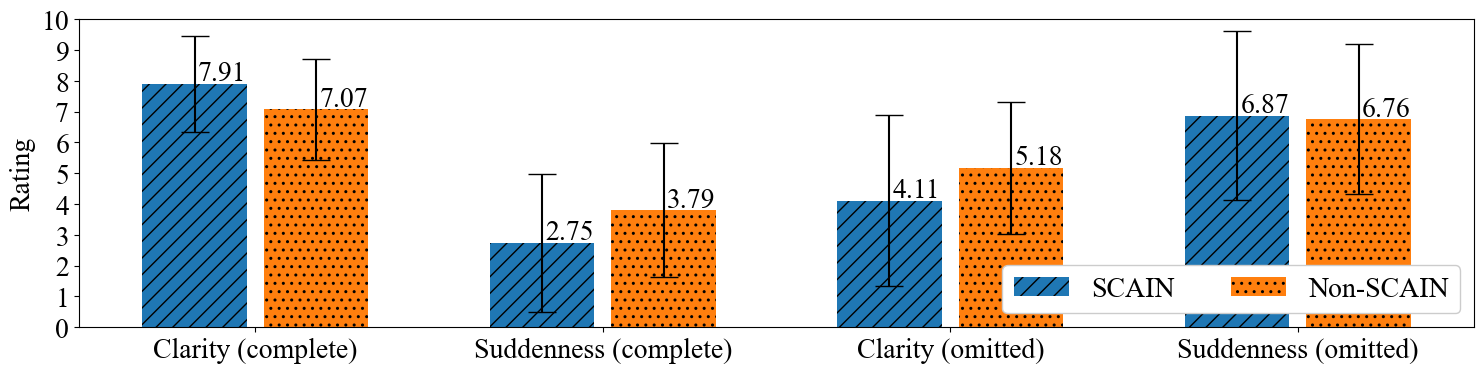

In [8]:
# Show bar graphs
import matplotlib.pyplot as plt
import statistics
import numpy as np

fig, ax = plt.subplots(figsize=(18, 4))
plt.rcParams["font.family"] = "Times New Roman"   # 使用するフォント
plt.rcParams["font.size"] = 20                 # 文字の大きさ
labels = ("Clarity (complete)", "Suddenness (complete)", "Clarity (omitted)", "Suddenness (omitted)")
rate_means = {
    "SCAIN": ((
        statistics.mean(full_understand_low),
        statistics.mean(full_sudden_low),
        statistics.mean(omit_understand_low),
        statistics.mean(omit_sudden_low)
    ),
    (
        statistics.stdev(full_understand_low),
        statistics.stdev(full_sudden_low), 
        statistics.stdev(omit_understand_low), 
        statistics.stdev(omit_sudden_low)
    )),
    "Non-SCAIN": ((
        statistics.mean(full_understand_high),
        statistics.mean(full_sudden_high),
        statistics.mean(omit_understand_high),
        statistics.mean(omit_sudden_high)
    ),
    (
        statistics.stdev(full_understand_high),
        statistics.stdev(full_sudden_high), 
        statistics.stdev(omit_understand_high), 
        statistics.stdev(omit_sudden_high)
    ))
}
rate_stds = {
    "SCAIN": (
        statistics.stdev(full_understand_low),
        statistics.stdev(full_sudden_low), 
        statistics.stdev(omit_understand_low), 
        statistics.stdev(omit_sudden_low)
    ),
    "Non-SCAIN": (
        statistics.stdev(full_understand_high),
        statistics.stdev(full_sudden_high), 
        statistics.stdev(omit_understand_high), 
        statistics.stdev(omit_sudden_high)
    )
}
x = np.arange(len(labels))
width = 0.3
margin = 0.05
multiplier = 0
yticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
ylim = (0, 10)

xcoord = []
ycoord = []
for attribute, measurement in rate_means.items():
    offset = (width + margin) * multiplier
    rects = ax.bar(x + offset, measurement[0], width, yerr=measurement[1], capsize=10, label=attribute)
    #ax.bar_label(rects, fmt="%0.2f")
    for i in range(len(x)):
        plt.text(x[i] + offset + 0.01, measurement[0][i] + 0.1, "{:1.2f}".format(measurement[0][i]))
        xcoord.append(x[i] + offset)
        ycoord.append(measurement[0][i] + measurement[1][i])
    multiplier += 1

bars = ax.patches
patterns = ['//', '..']  # set hatch patterns in the correct order
hatches = []  # list for hatches in the order of the bars
for h in patterns:  # loop over patterns to create bar-ordered hatches
    for i in range(int(len(bars) / len(patterns))):
        hatches.append(h)
for bar, hatch in zip(bars, hatches):  # loop over bars and hatches to set hatches in correct order
    bar.set_hatch(hatch)

#xcoord = [i + d for i in range(len(x)) for d in [-(width + margin) / 2, (width + margin) / 2]]
#barplot_annotate_brackets(0, 5, "*", xcoord, ycoord)
#barplot_annotate_brackets(1, 6, "*", xcoord, ycoord)
#barplot_annotate_brackets(2, 7, "**", xcoord, ycoord)
#barplot_annotate_brackets(3, 8, "n.s.", xcoord, ycoord)
#barplot_annotate_brackets(4, 9, "***", xcoord, ycoord)

ax.set_ylabel("Rating")
ax.set_xticks(x + (width + margin) / 2, labels)
ax.set_yticks(yticks)
ax.set_ylim(ylim)
ax.legend(loc='lower right', ncols=2, framealpha=1)


In [5]:
# Two-way ANOVA
import pandas as pd

# Prepare DataFrame
clarity_data = pd.DataFrame(
    columns=["rating", "condition", "dialogue", "rater"]
)
suddenness_data = pd.DataFrame(columns=["rating", "condition", "dialogue", "rater"])

for stats in stats_list:
    for clarity, rater in zip(stats.full_understand, stats.full_rater):
        clarity_new = pd.DataFrame({
            "rating": [clarity],
            "condition": stats.condition,
            "dialogue": "complete",
            "rater": rater
        })
        clarity_data = pd.concat([clarity_data, clarity_new])

    for clarity, rater in zip(stats.omit_understand, stats.omit_rater):
        clarity_new = pd.DataFrame({
            "rating": [clarity],
            "condition": stats.condition,
            "dialogue": "omitted",
            "rater": rater
        })
        clarity_data = pd.concat([clarity_data, clarity_new])

    for suddenness, rater in zip(stats.full_sudden, stats.full_rater):
        suddenness_new = pd.DataFrame({
            "rating": [suddenness],
            "condition": stats.condition,
            "dialogue": "complete",
            "rater": rater
        })
        suddenness_data = pd.concat([suddenness_data, suddenness_new])

    for suddenness, rater in zip(stats.omit_sudden, stats.omit_rater):
        suddenness_new = pd.DataFrame({
            "rating": [suddenness],
            "condition": stats.condition,
            "dialogue": "omitted",
            "rater": rater
        })
        suddenness_data = pd.concat([suddenness_data, suddenness_new])

clarity_data = clarity_data.astype({
    "rating": int,
    "condition": str,
    "dialogue": str,
    "rater": int
})
suddenness_data = suddenness_data.astype({
    "rating": int,
    "rater": str
})

In [7]:
print(clarity_data)

    rating condition  dialogue  rater
0        7       low  complete      0
0        6       low  complete      1
0        8       low  complete      2
0        7       low   omitted     30
0        5       low   omitted     31
..     ...       ...       ...    ...
0        8       low  complete     28
0        8       low  complete     29
0        8       low   omitted     57
0        9       low   omitted     58
0        6       low   omitted     59

[600 rows x 4 columns]


In [6]:
# Run ANOVA
import pingouin as pg

anovaCL = pg.mixed_anova(
    data=clarity_data, 
    dv="rating", 
    subject="rater", 
    within='condition', 
    between="dialogue"
)
anovaCL.round(3)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,dialogue,242.536,1,58,242.536,45.666,0.00,0.441,NaN
1,condition,0.408,1,58,0.408,0.294,0.59,0.005,1.0
2,Interaction,27.075,1,58,27.075,19.479,0.00,0.251,NaN


In [10]:
anovaSU = pg.mixed_anova(
    data=suddenness_data, 
    dv="rating", 
    subject="rater", 
    within='condition', 
    between="dialogue"
)
anovaSU.round(3)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,dialogue,377.365,1,58,377.365,77.843,0.000,0.573,NaN
1,condition,6.533,1,58,6.533,5.779,0.019,0.091,1.0
2,Interaction,10.092,1,58,10.092,8.926,0.004,0.133,NaN
